In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def portfolio_performance_vs_benchmarks(tickers, weights, benchmarks, start, end):
    """
    Plots portfolio performance vs any number of benchmark ETFs/stocks,
    assuming dividend reinvestment.

    Parameters
    ----------
    tickers : list[str]
        Portfolio stock tickers.
    weights : list[float]
        Portfolio weights (must sum to 1.0).
    benchmarks : list[str]
        Benchmark tickers to compare against (e.g., ["SPY", "QQQ", "VUG", "ARKK"]).
    start : str
        Start date (YYYY-MM-DD).
    end : str
        End date (YYYY-MM-DD).
    """

    # --- Validate inputs ---
    weights = np.array(weights, dtype=float)
    if len(tickers) != len(weights):
        raise ValueError("Length of tickers and weights must match.")
    if not np.isclose(weights.sum(), 1.0):
        raise ValueError("Portfolio weights must sum to 1.0.")
    if not benchmarks:
        raise ValueError("At least one benchmark ticker must be provided.")

    all_tickers = tickers + benchmarks

    # --- Download Adjusted Close data ---
    data = yf.download(all_tickers, start=start, end=end, progress=False)["Close"].dropna()

    # --- Separate portfolio and benchmark data ---
    port_data = data[tickers]
    bench_data = data[benchmarks]

    # --- Normalize prices ---
    port_norm = port_data / port_data.iloc[0]
    bench_norm = bench_data / bench_data.iloc[0]

    # --- Compute portfolio performance ---
    portfolio = (port_norm * weights).sum(axis=1)

    # --- Compute total + annualized returns ---
    total_ret_port = (portfolio.iloc[-1] / portfolio.iloc[0] - 1) * 100
    ann_ret_port = (portfolio.iloc[-1] / portfolio.iloc[0]) ** (252 / len(portfolio)) - 1

    bench_returns = {}
    for b in benchmarks:
        total_ret = (bench_norm[b].iloc[-1] / bench_norm[b].iloc[0] - 1) * 100
        ann_ret = (bench_norm[b].iloc[-1] / bench_norm[b].iloc[0]) ** (252 / len(bench_norm)) - 1
        bench_returns[b] = (total_ret, ann_ret)

    # --- Plot ---
    plt.figure(figsize=(12, 7))
    plt.plot(portfolio.index, portfolio, label="Your Portfolio", linewidth=2.5, color="black")

    for b in benchmarks:
        plt.plot(bench_norm.index, bench_norm[b], label=f"{b}", linewidth=2, alpha=0.8)

    plt.title("Portfolio Performance vs Benchmarks (Dividend Reinvestment Assumed)")
    plt.xlabel("Date")
    plt.ylabel("Growth of $1")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Summary printout ---
    print("----- Portfolio Summary -----")
    print(f"Period: {portfolio.index[0].date()} → {portfolio.index[-1].date()}")
    print(f"Portfolio Total Return: {total_ret_port:.2f}%")
    print(f"Portfolio Annualized:   {ann_ret_port*100:.2f}%\n")

    for b, (tot, ann) in bench_returns.items():
        print(f"{b:<8}  Total: {tot:.2f}%   Annualized: {ann*100:.2f}%")
    print("-----------------------------")

    return portfolio, bench_norm

/tmp/ipykernel_876141/2804424131.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(all_tickers, start=start, end=end, progress=False)["Close"].dropna()


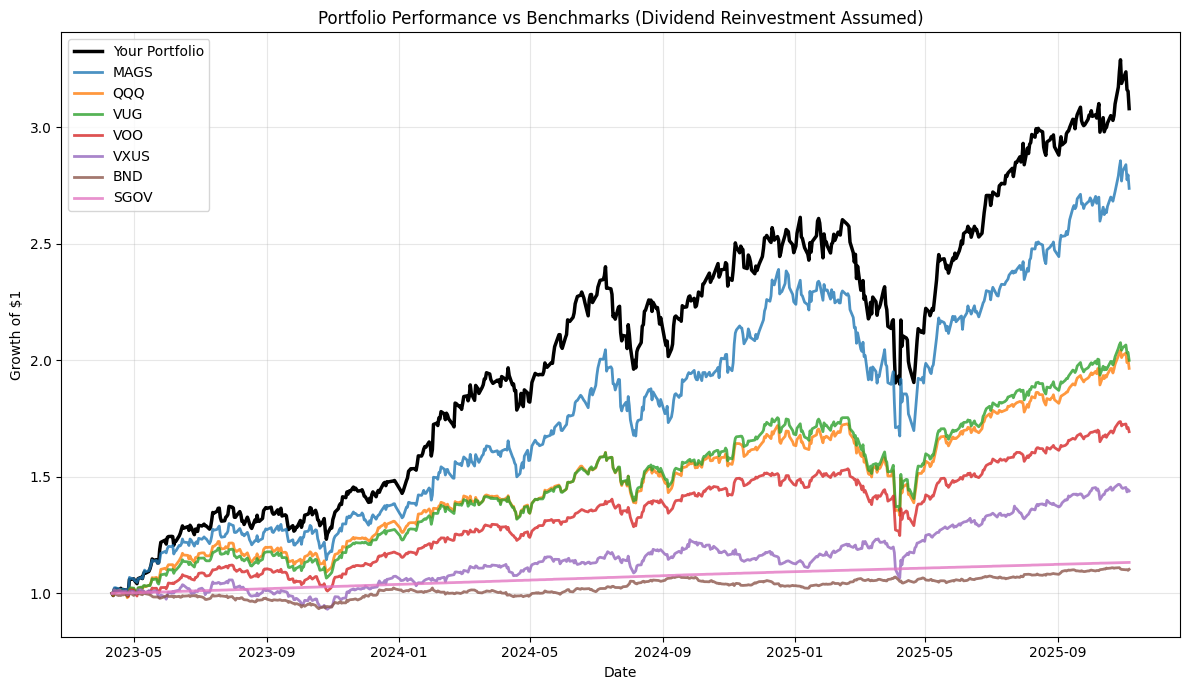

----- Portfolio Summary -----
Period: 2023-04-11 → 2025-11-06
Portfolio Total Return: 208.07%
Portfolio Annualized:   54.89%

MAGS      Total: 173.85%   Annualized: 47.96%
QQQ       Total: 96.60%   Annualized: 30.07%
VUG       Total: 100.06%   Annualized: 30.95%
VOO       Total: 69.43%   Annualized: 22.76%
VXUS      Total: 43.98%   Annualized: 15.23%
BND       Total: 10.33%   Annualized: 3.90%
SGOV      Total: 13.30%   Annualized: 4.98%
-----------------------------


In [3]:
tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "META", "NVDA"]
equal_weights = 1 / len(tickers)
weights = [equal_weights] * len(tickers)
benchmarks = ["MAGS", "QQQ", "VUG", "VOO", "VXUS", "BND", "SGOV"]
start = "2023-01-01"
end = "2025-11-07"

portfolio, bench_norm = portfolio_performance_vs_benchmarks(tickers, weights, benchmarks, start, end)